In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aslanahmedov/walmart-sales-forecast")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/aslanahmedov/walmart-sales-forecast/versions/1


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle

import libraries

In [ ]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.options.display.max_columns=100 # to see columns

In [ ]:
df_store = pd.read_csv('/content/stores.csv') #store data

In [ ]:
df_train = pd.read_csv('/content/train.csv') # train set

In [ ]:
df_features = pd.read_csv('/content/features.csv') #external information

In [ ]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

In [ ]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [ ]:
df.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
df.shape

(421570, 16)

In [ ]:
df['Store'].nunique() # number of stores

45

In [ ]:
df['Dept'].nunique() # number of Departments

81

In [ ]:
# Checking the avg weekly sales of each store and each department in that store
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

After merging the data, it is evident that the store numbers range from 1 to 45 and the department numbers range from 1 to 99. However, some department numbers are missing, such as 88 and 89. In total, there are 81 departments.

From the pivot table, it is clear that some values are incorrect, such as weekly sales showing 0 or negative amounts. Sales cannot be negative, and it is unlikely for a department to have no sales for an entire week. Therefore, I will adjust these values accordingly.

In [ ]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


This shows us that there are 1358 rows which show weekly sales as 0 or in negative. We can disregard these rows as they only contribute as 0.3% of the total 421570 rows.

In [ ]:
df = df.loc[df['Weekly_Sales'] > 0]

In [ ]:
#This is the new data
df.shape

(420212, 16)

In [ ]:
result = pd.concat([df['Date'].head(5), df['Date'].tail(5)])
print(result)

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, dtype: object


The shows us that the data we are working with is from February 5th 2010 to October 26th 2012.

## **Holidays**

Holidays significantly impact sales throughout the year, often driving sharp increases in consumer spending due to seasonal demand, promotions, and festive celebrations. Retailers experience spikes during major holidays like Black Friday, Christmas, and Thanksgiving, making these periods critical for annual revenue generation.

Considering 4 holidays:


*   Thanksgiving

*   Labour Day
*   Christmas


*   Supwerbowl



I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [ ]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [ ]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [ ]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

In [ ]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

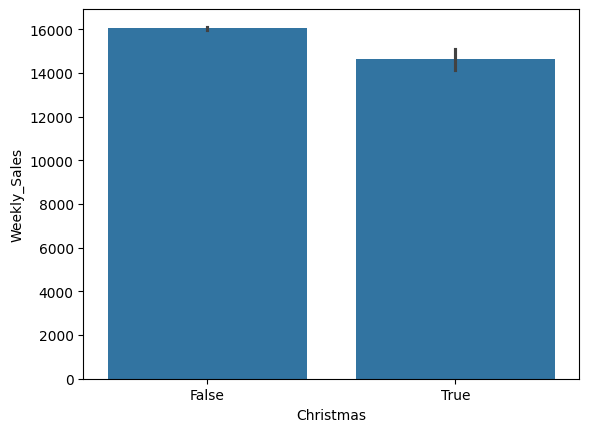

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

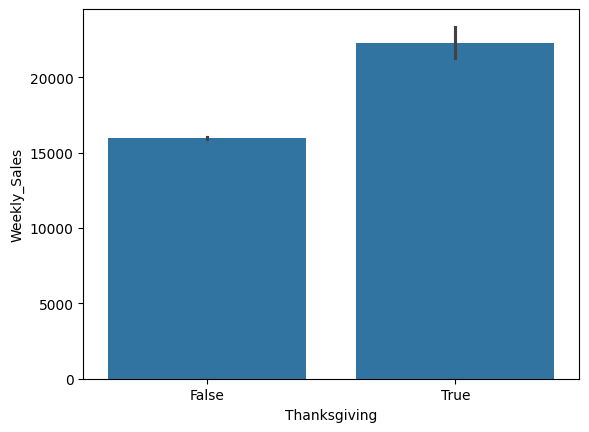

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

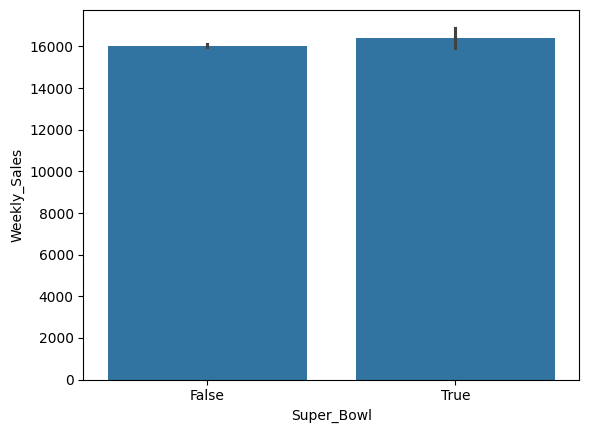

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

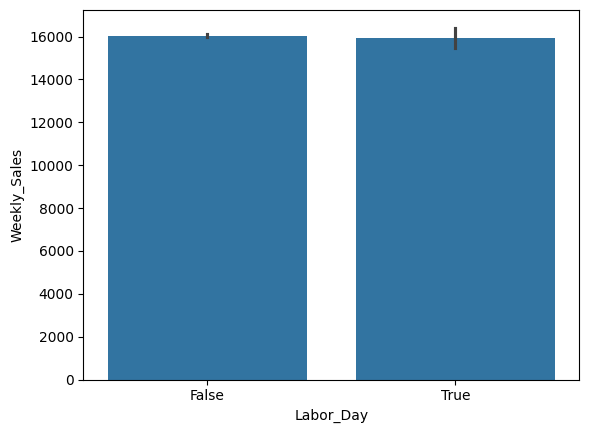

In [ ]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

From the above 4 plots we can tell that, out of 4 major holidays only 2 holidays i.e., Thanksgiving has the highest followed by Superbowl have an increase in weekly sales.

## **Holiday effect on Different types of Stores**

There are three different kind of stores A, B, and C. Each holiday has a different effect on one of these stores. First we start of by calculating the average weekly sales for each type of store.

In [ ]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for each store type on Christmas

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for each store type on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for each store type on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for store type on Super Bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

,Weekly_Sales
IsHoliday,
False,15952.816352
True,17094.300918


In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


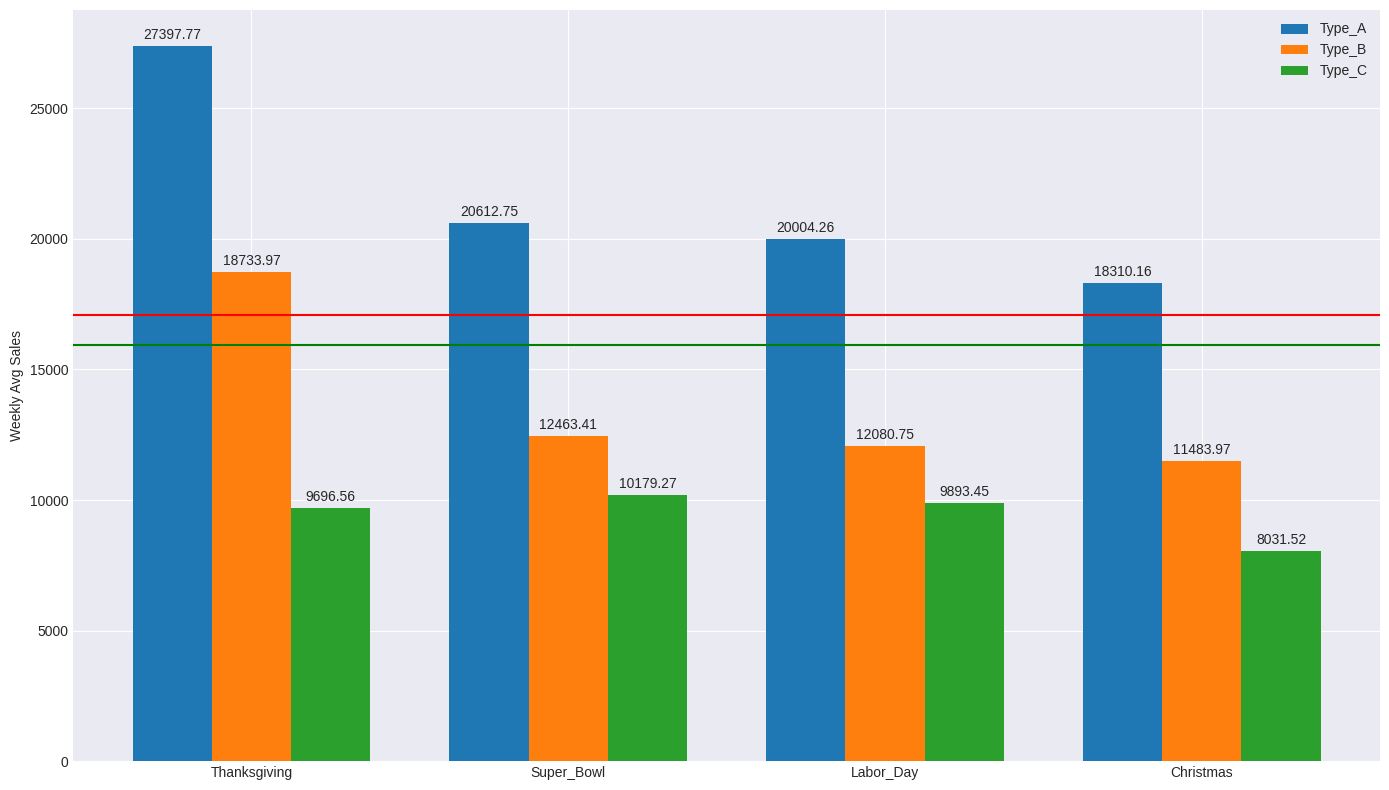

In [ ]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-v0_8-darkgrid')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

From this plot we can clearly tell that Store A has the highest weekly sales when comapred to Store B and Store C during all the 4 holidays.

In [ ]:
df.sort_values(by='Weekly_Sales',ascending=False).head(10) #to show the top 5 weekly sales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Thanksgiving,Labor_Day,Christmas,Super_Bowl
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,True,False,False,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,True,False,False,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,True,False,False,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,True,False,False,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,True,False,False,False
195088,20,72,2010-11-26,422306.25,True,46.66,3.039,NaN,NaN,NaN,NaN,NaN,204.962100,7.484,A,203742,True,False,False,False
264390,27,72,2010-11-26,420586.57,True,46.67,3.186,NaN,NaN,NaN,NaN,NaN,136.689571,8.021,A,204184,True,False,False,False
88428,10,7,2010-12-24,406988.63,False,57.06,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,B,126512,False,False,False,False
95377,10,72,2010-12-24,404245.03,False,57.06,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,B,126512,False,False,False,False
214432,22,72,2010-11-26,393705.20,True,44.61,3.070,NaN,NaN,NaN,NaN,NaN,136.689571,8.572,B,119557,True,False,False,False


The above table shows us the Top 10 weekly sales from the data. We can see that the Top 7 weekly sales were during Thanksgiving.

In [ ]:
df_store.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


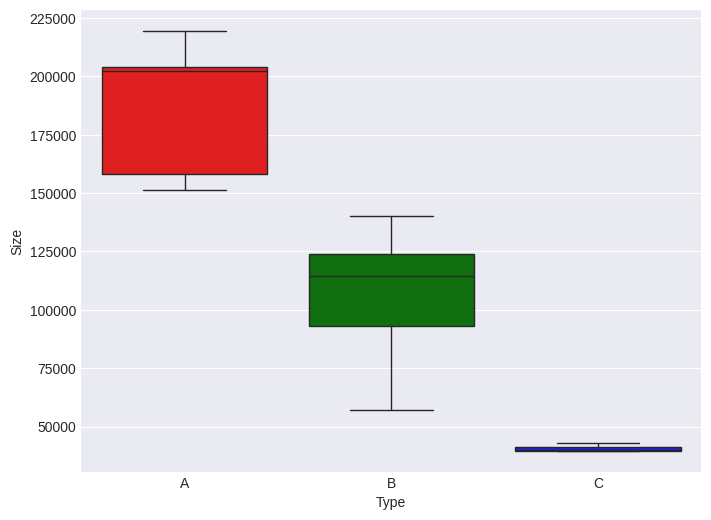

In [ ]:
# Setting up the figure
plt.figure(figsize=(8, 6))  # To see the type-size relation

fig = sns.boxplot(
    x='Type',
    y='Size',
    data=df,
    showfliers=False,
    palette={'A': 'red', 'B': 'green', 'C': 'blue'}
)

plt.show()

The graph effectively demonstrates a consistent relationship between store size and sales across different store types. Larger store sizes, as expected, correspond to higher sales figures. This suggests that Walmart's classification of stores into Types A, B, and C is based on their physical size, which directly impacts their sales potential.

The transition between store types is evident: the smallest size value of Type A marks the beginning of Type B, and similarly, the smallest size value of Type B marks the onset of Type C. This segmentation indicates a structured classification system, where each type represents a distinct range of store sizes and associated sales capacities.

This correlation aligns with the operational logic that larger stores, with their greater space, can accommodate more products and customers, thus achieving higher sales. The pattern underscores Walmart's strategic approach to store classification, ensuring a clear differentiation based on size and performance metrics.

## **Handling Markdown Coloumns**

In the data we have 5 different makrdown coloumns. In these coloumns there are a lot of missing values and null values.

Let us check in the data frame which coloumns have missing or null values and then fill them with 0.

In [ ]:
df.isna().sum() #check dataframe for missing and null values

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270031
MarkDown2,309308
MarkDown3,283561


In [ ]:
df = df.fillna(0) #filling null values with 0

In [ ]:
df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


We can see that all the null values and missing values are replaced by 0's

## **Deep Dive into Sales**

**Weekly Sales by Department**

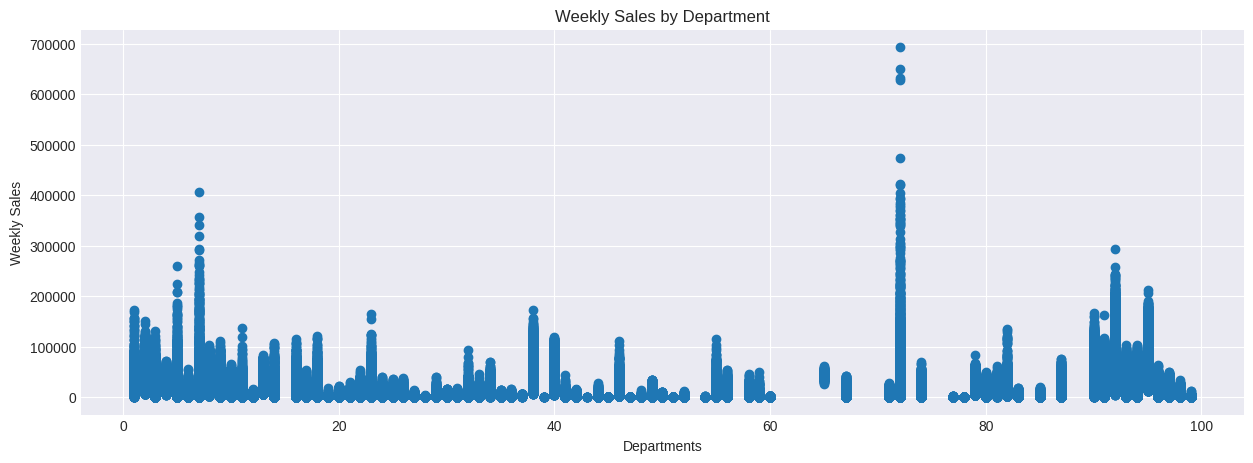

In [ ]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

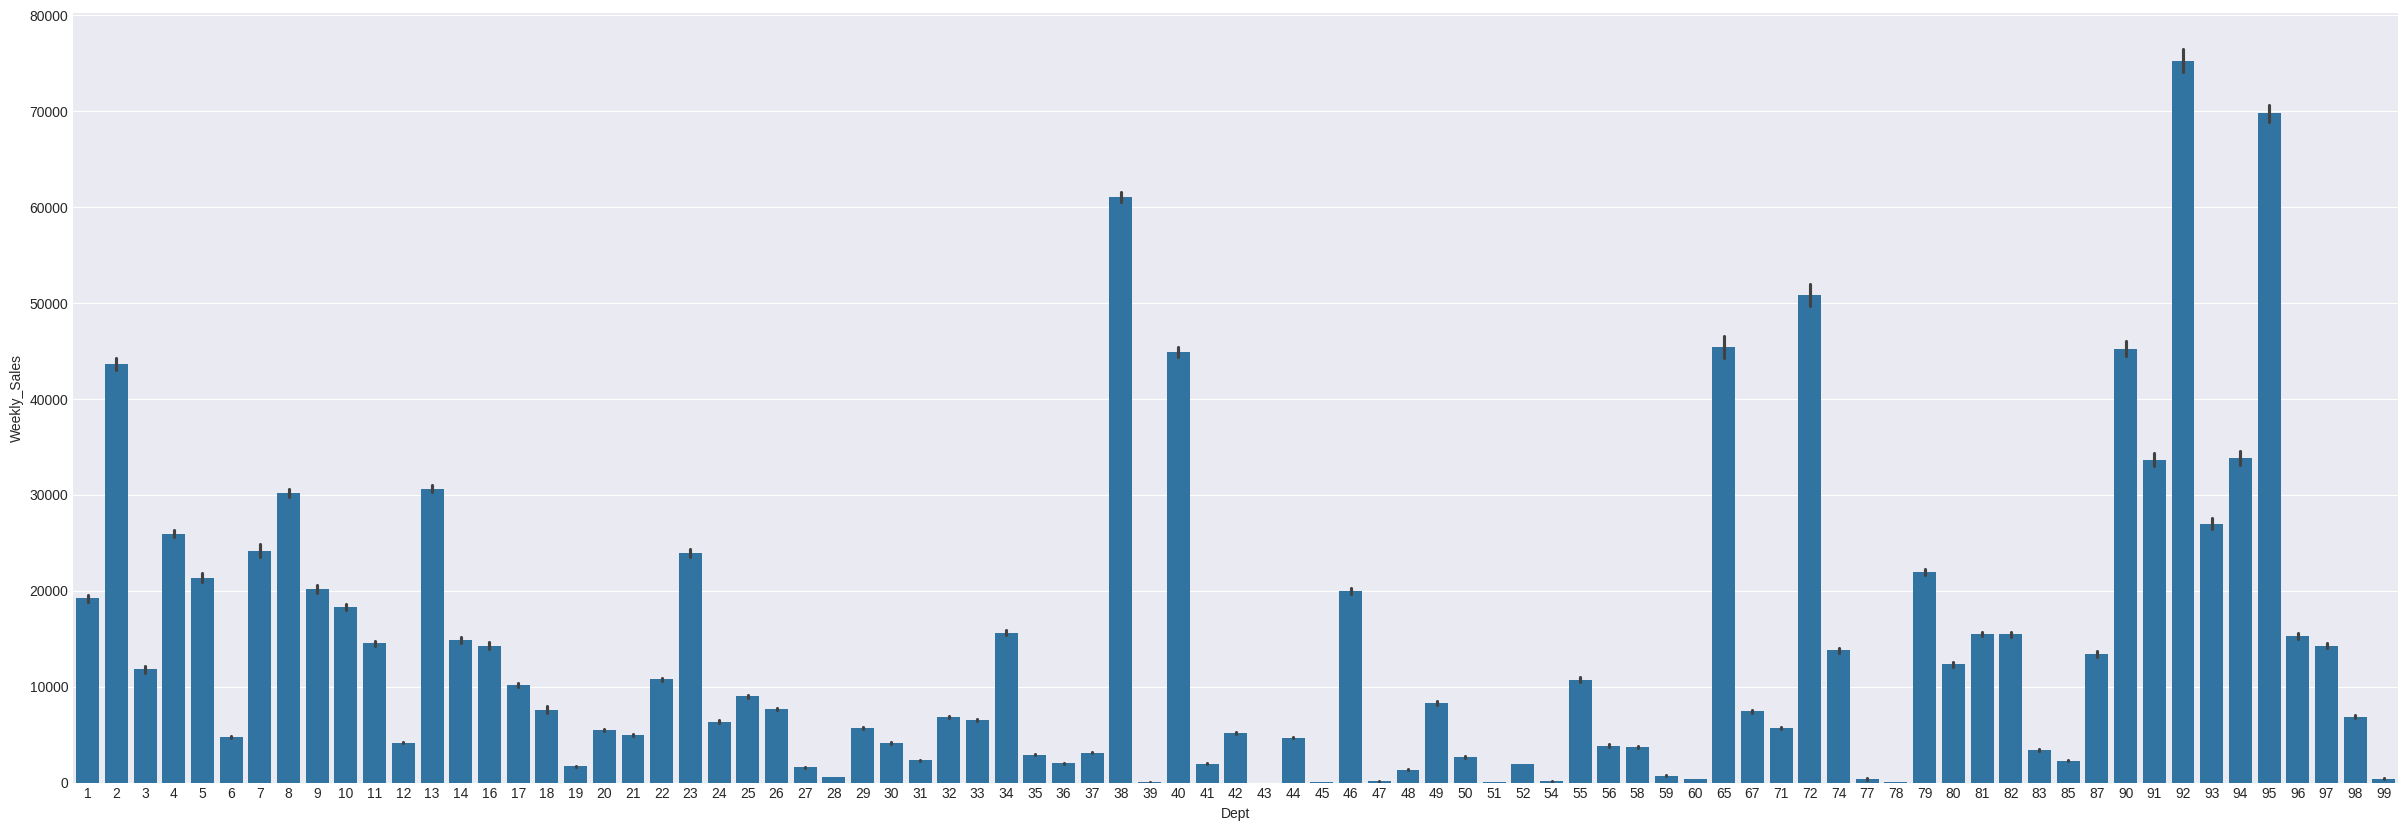

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

**Weekly Sales by Stores**

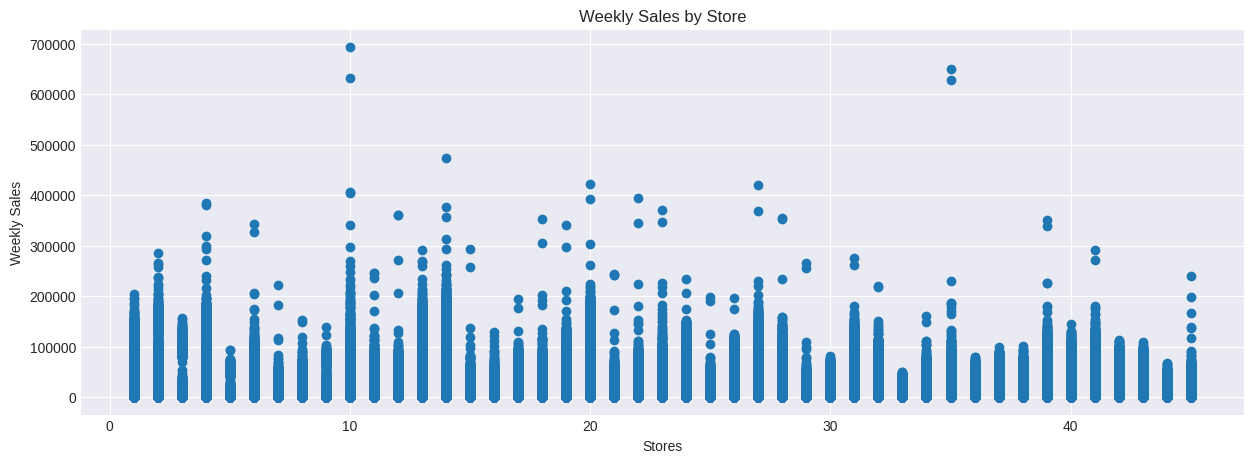

In [ ]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

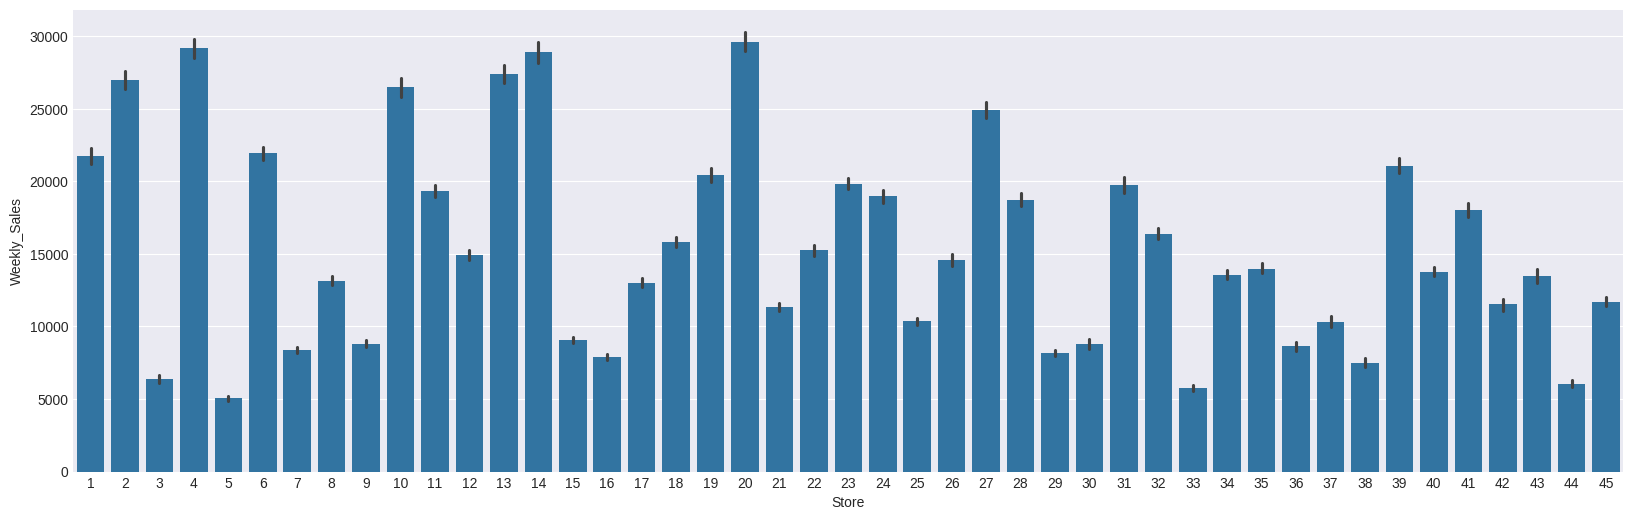

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])  # Convert to datetime
df["Week"] = df["Date"].dt.isocalendar().week  # Extract week number
df["Month"] = df["Date"].dt.month  # Extract month
df["Year"] = df["Date"].dt.year  # Extract year

Total Sales by Month:
Month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

Best Month for Sales: 12 with sales of 19,425.80

Total Sales by Year:
Year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

Best Year for Sales: 2010 with sales of 16,318.65


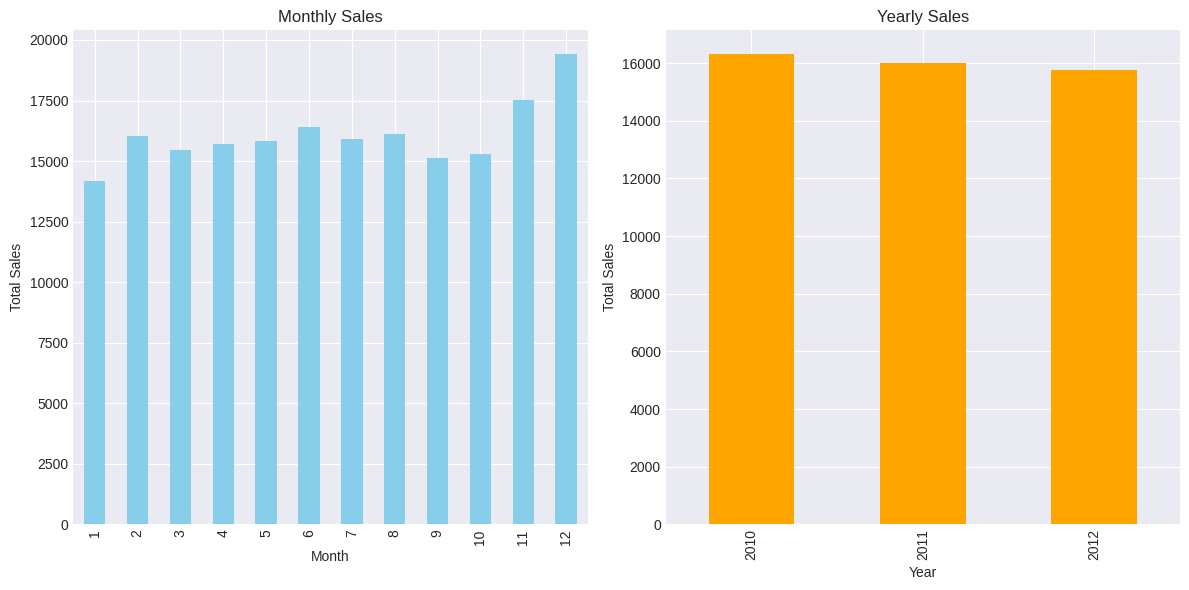

In [ ]:
import pandas as pd

# Assuming the DataFrame `df` has columns "Date" and "Sales"
df["Date"] = pd.to_datetime(df["Date"])  # Convert to datetime
df["Month"] = df["Date"].dt.month  # Extract month
df["Year"] = df["Date"].dt.year  # Extract year

# Grouping by Year and Month to calculate total sales
monthly_sales = df.groupby("Month")["Weekly_Sales"].mean()
yearly_sales = df.groupby("Year")["Weekly_Sales"].mean()

# Finding the best month and year
best_month = monthly_sales.idxmax()
best_year = yearly_sales.idxmax()

# Printing the results
print("Total Sales by Month:")
print(monthly_sales)
print(f"\nBest Month for Sales: {best_month} with sales of {monthly_sales[best_month]:,.2f}")

print("\nTotal Sales by Year:")
print(yearly_sales)
print(f"\nBest Year for Sales: {best_year} with sales of {yearly_sales[best_year]:,.2f}")

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting Monthly Sales
plt.subplot(1, 2, 1)
monthly_sales.plot(kind="bar", color="skyblue")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")

# Plotting Yearly Sales
plt.subplot(1, 2, 2)
yearly_sales.plot(kind="bar", color="orange")
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

**The effect of Temperature, Fuel Price, CPI, and Unemployment on Weekly Sales.**

<Figure size 1000x600 with 0 Axes>

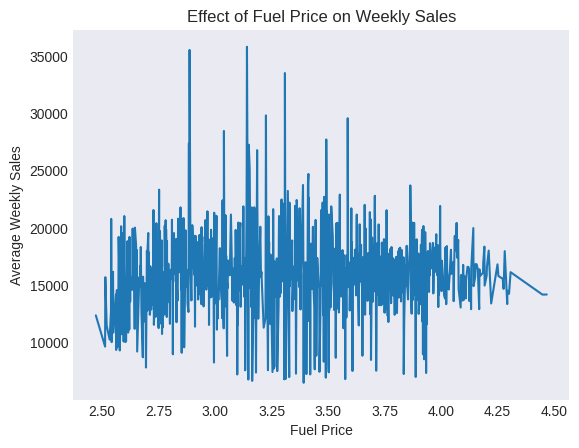

<Figure size 1000x600 with 0 Axes>

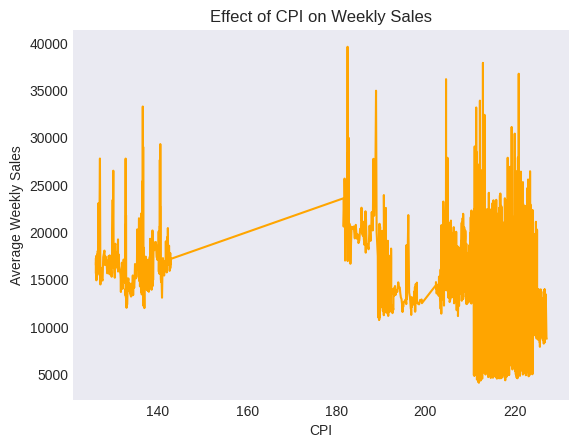

<Figure size 1000x600 with 0 Axes>

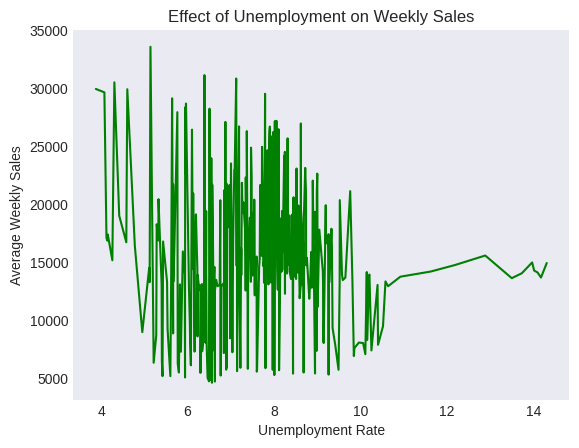

<Figure size 1000x600 with 0 Axes>

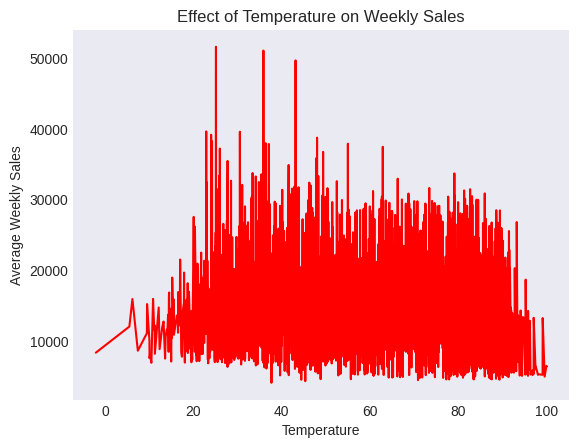

In [ ]:
fuel_pivot = df.pivot_table(values="Weekly_Sales", index="Fuel_Price", aggfunc="mean")
cpi_pivot = df.pivot_table(values="Weekly_Sales", index="CPI", aggfunc="mean")
unemployment_pivot = df.pivot_table(values="Weekly_Sales", index="Unemployment", aggfunc="mean")
temperature_pivot = df.pivot_table(values="Weekly_Sales", index="Temperature", aggfunc="mean")

plt.figure(figsize=(10, 6))
fuel_pivot.plot(kind="line", legend=False)
plt.title("Effect of Fuel Price on Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Average Weekly Sales")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
cpi_pivot.plot(kind="line", color="orange", legend=False)
plt.title("Effect of CPI on Weekly Sales")
plt.xlabel("CPI")
plt.ylabel("Average Weekly Sales")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
unemployment_pivot.plot(kind="line", color="green", legend=False)
plt.title("Effect of Unemployment on Weekly Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Average Weekly Sales")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
temperature_pivot.plot(kind="line", color="red", legend=False)
plt.title("Effect of Temperature on Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Average Weekly Sales")
plt.grid()
plt.show()

In [ ]:
df.to_csv('clean_data.csv') # assign new data frame to csv for using after here

## **Time Series Forecasting**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.options.display.max_columns=100 # to see columns

In [ ]:
df = pd.read_csv('./clean_data.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) # changing datetime to divide if needs

## **Encoding the Data**

For preprocessing our data, I will change holidays boolean values to 0-1 and replace type of the stores from A, B, C to 1, 2, 3.

In [ ]:
df_encoded = df.copy() # to keep original dataframe taking copy of it

In [ ]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [ ]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1

In [ ]:
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1

In [ ]:
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1

In [ ]:
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1

In [ ]:
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1

In [ ]:
df_new = df_encoded.copy() # taking the copy of encoded df to keep it original

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Thanksgiving,Labor_Day,Christmas,Super_Bowl,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,False,False,False,True,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,False,False,False,False,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,False,False,False,False,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,False,False,False,False,9,3,2010


In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing

In [ ]:
df.set_index('Date', inplace=True) #seting date as index

**Plotting Sales**

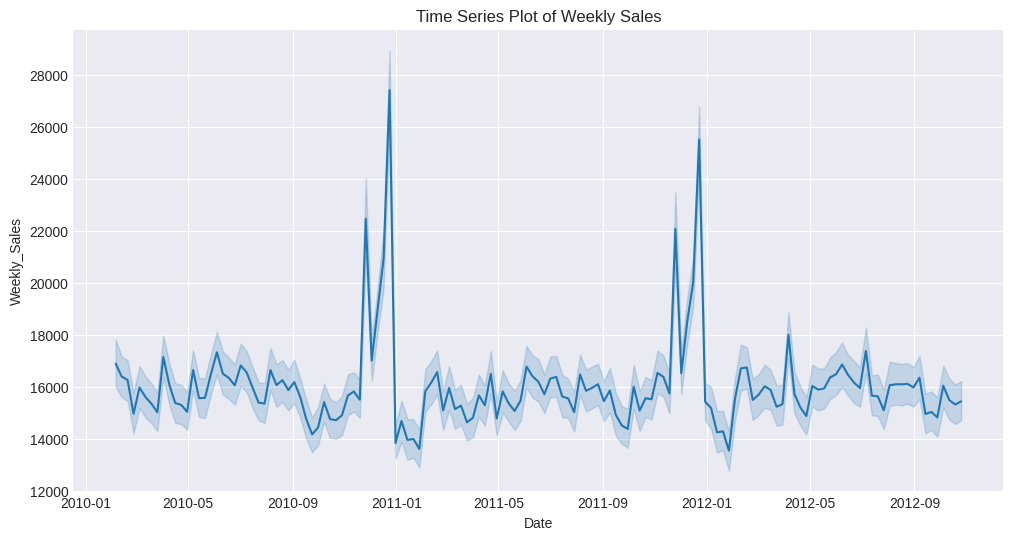

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title("Time Series Plot of Weekly Sales")
plt.legend()
plt.show()

In [ ]:
# Resample weekly and calculate the mean for numeric columns
df_week = df.select_dtypes(include='number').resample('W').mean()

print("Weekly Resampled Data:")
print(df_week.head())

Weekly Resampled Data:
                Store       Dept  Weekly_Sales  Temperature  Fuel_Price  \
Date                                                                      
2010-02-07  22.040394  44.161236  16887.602166    33.282800    2.717968   
2010-02-14  22.006443  44.331638  16390.912208    33.370444    2.695955   
2010-02-21  22.044444  44.287542  16255.185970    37.032596    2.673506   
2010-02-28  22.021088  44.058844  14955.932194    38.624806    2.685486   
2010-03-07  22.056199  44.019755  15964.821240    42.367490    2.731923   

            MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                                                            
2010-02-07        0.0        0.0        0.0        0.0        0.0  167.328549   
2010-02-14        0.0        0.0        0.0        0.0        0.0  167.401961   
2010-02-21        0.0        0.0        0.0        0.0        0.0  167.386208   
2010-02-28        0.0        0.0        0.0   

In [ ]:
df_week.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
Date,,,,,,,,,,,,,,,,
2010-02-07,22.040394,44.161236,16887.602166,33.282800,2.717968,0.0,0.0,0.0,0.0,0.0,167.328549,8.578592,137381.684997,5.0,2.0,2010.0
2010-02-14,22.006443,44.331638,16390.912208,33.370444,2.695955,0.0,0.0,0.0,0.0,0.0,167.401961,8.567855,137675.080027,6.0,2.0,2010.0
2010-02-21,22.044444,44.287542,16255.185970,37.032596,2.673506,0.0,0.0,0.0,0.0,0.0,167.386208,8.574593,137277.810101,7.0,2.0,2010.0
2010-02-28,22.021088,44.058844,14955.932194,38.624806,2.685486,0.0,0.0,0.0,0.0,0.0,167.708233,8.562094,137365.977551,8.0,2.0,2010.0
2010-03-07,22.056199,44.019755,15964.821240,42.367490,2.731923,0.0,0.0,0.0,0.0,0.0,167.680036,8.573890,137556.273161,9.0,3.0,2010.0


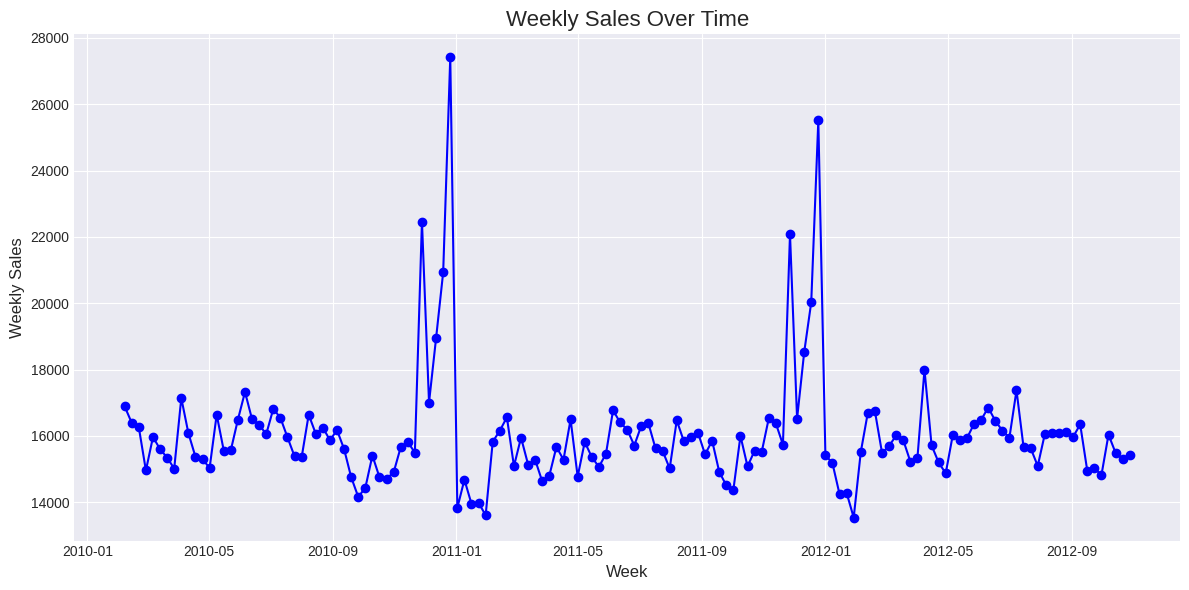

In [ ]:
import matplotlib.pyplot as plt

# Plot the weekly sales
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(df_week.index, df_week['Weekly_Sales'], color='blue', marker='o', linestyle='-')

# Add plot details
plt.title("Weekly Sales Over Time", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.grid(True)  # Show grid
plt.tight_layout()
plt.show()

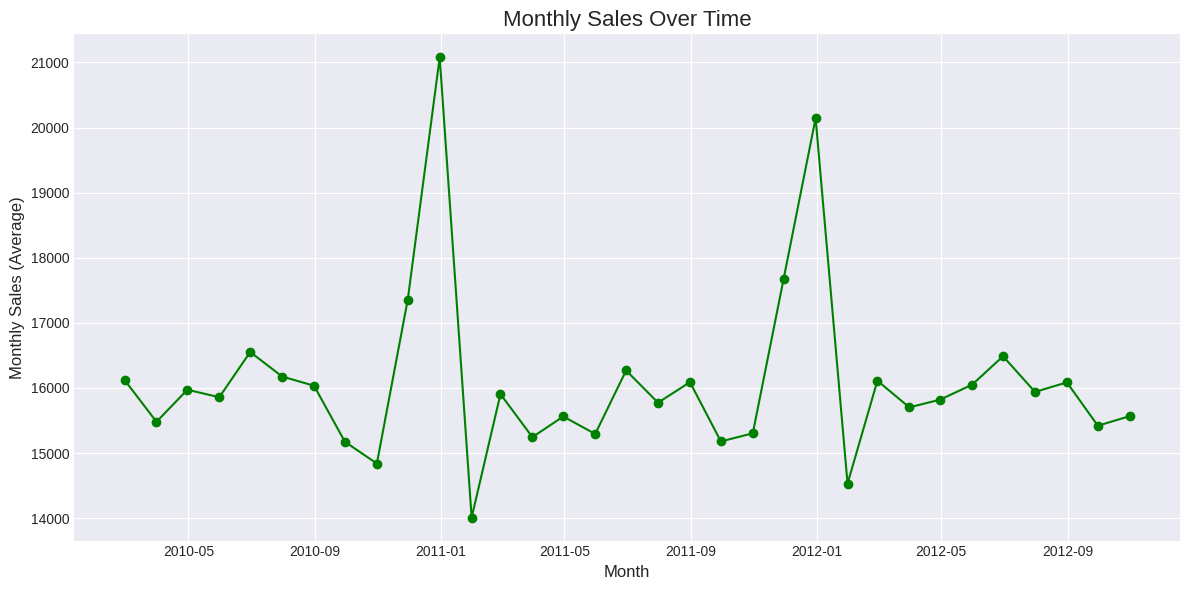

In [ ]:
import matplotlib.pyplot as plt

# Resample weekly data to monthly data and calculate the mean
df_month = df_week['Weekly_Sales'].resample('M').mean()

# Plot the monthly sales
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(df_month.index, df_month, color='green', marker='o', linestyle='-')

# Add plot details
plt.title("Monthly Sales Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Monthly Sales (Average)", fontsize=12)
plt.grid(True)  # Show grid
plt.tight_layout()
plt.show()

## **Creating a Test-Train Split of Data**

In [ ]:
train_data = df_week[:int(0.7*(len(df_week)))]
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 16)
Test: (43, 16)


In [ ]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

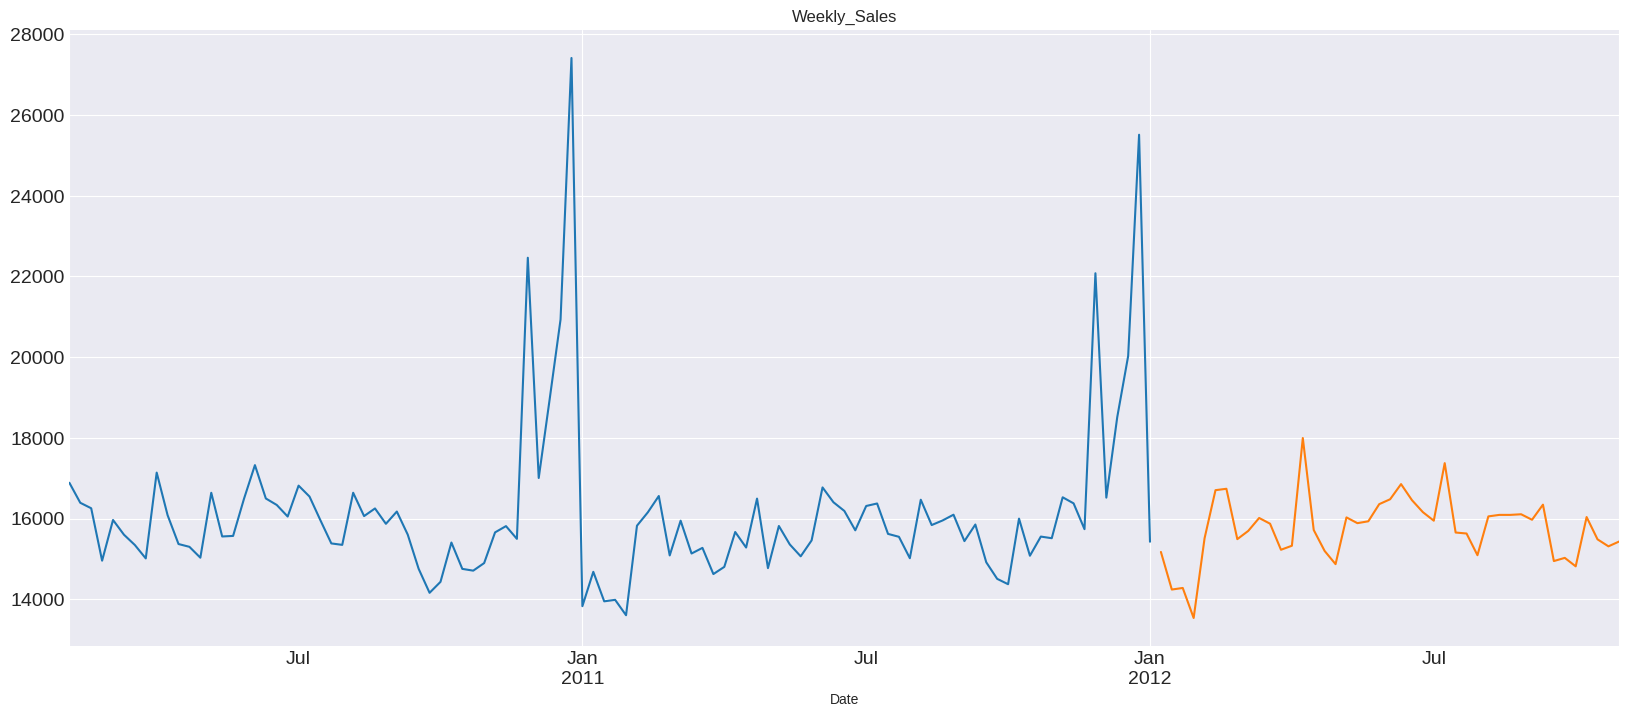

In [ ]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [ ]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data

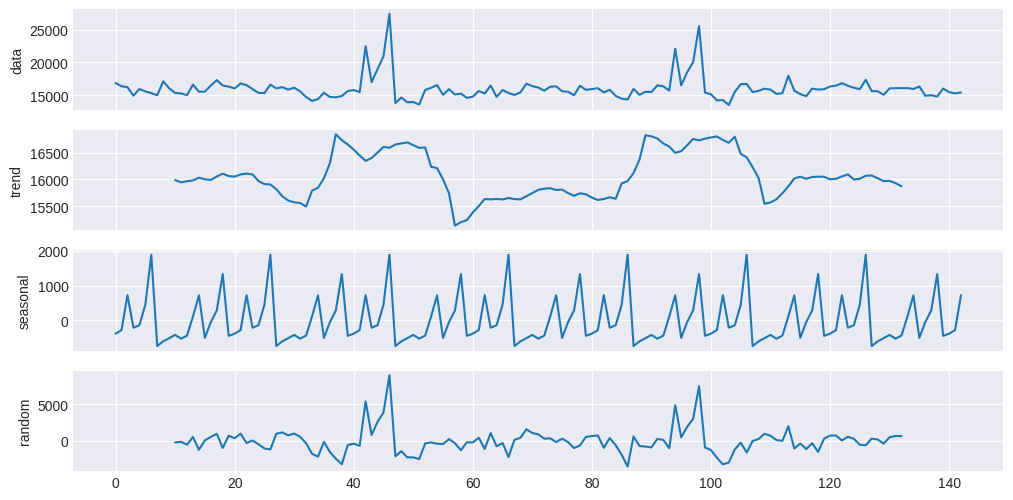

In [ ]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (12, 6)})
plt.show()

## **Making the data more stationary**

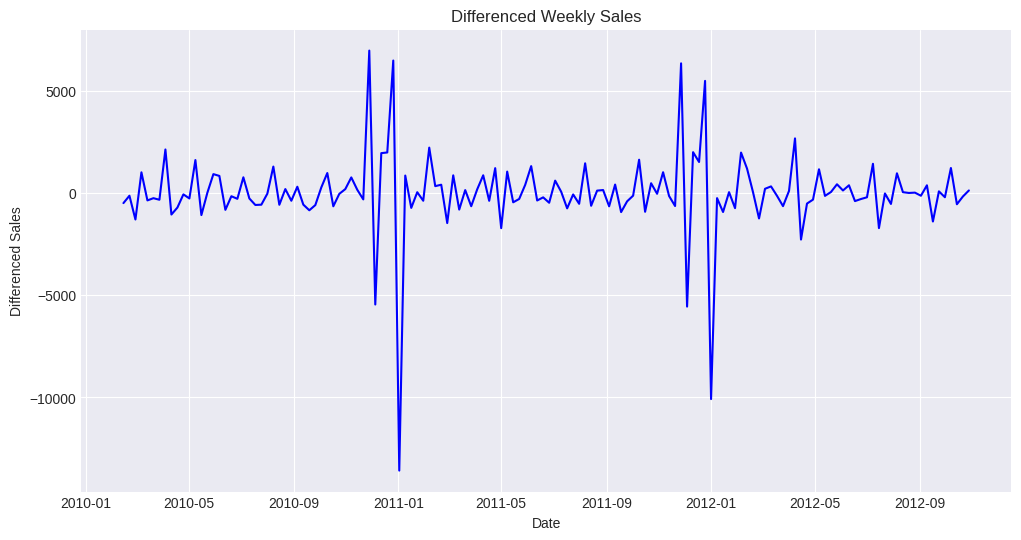

In [ ]:
# First difference of the 'Weekly_Sales'
df_week['Weekly_Sales_diff'] = df_week['Weekly_Sales'].diff()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_week.index, df_week['Weekly_Sales_diff'], color='blue')
plt.title("Differenced Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Differenced Sales")
plt.grid(True)
plt.show()

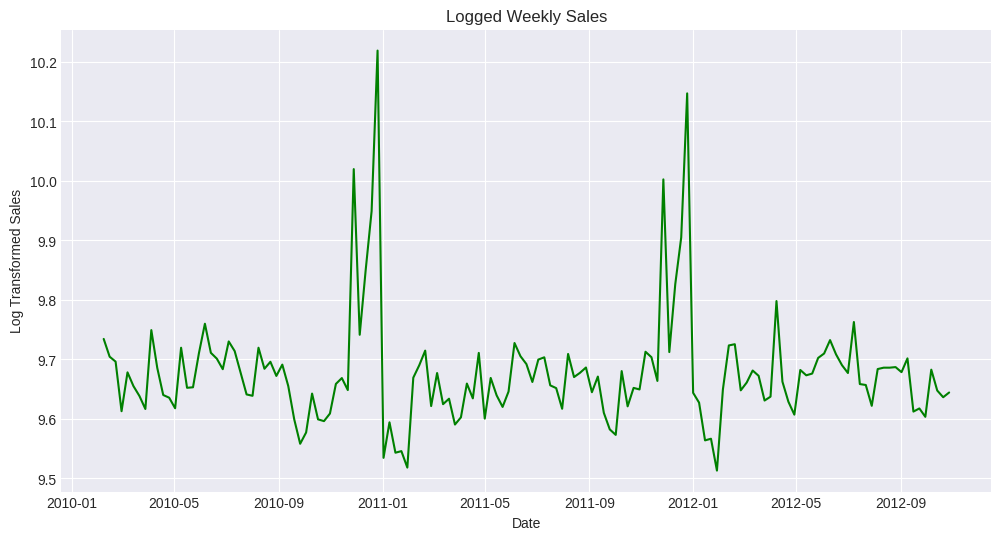

In [ ]:
# Log transformation of the 'Weekly_Sales'
df_week['Weekly_Sales_log'] = np.log(df_week['Weekly_Sales'])

# Plot the logged data
plt.figure(figsize=(12, 6))
plt.plot(df_week.index, df_week['Weekly_Sales_log'], color='green')
plt.title("Logged Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Log Transformed Sales")
plt.grid(True)
plt.show()

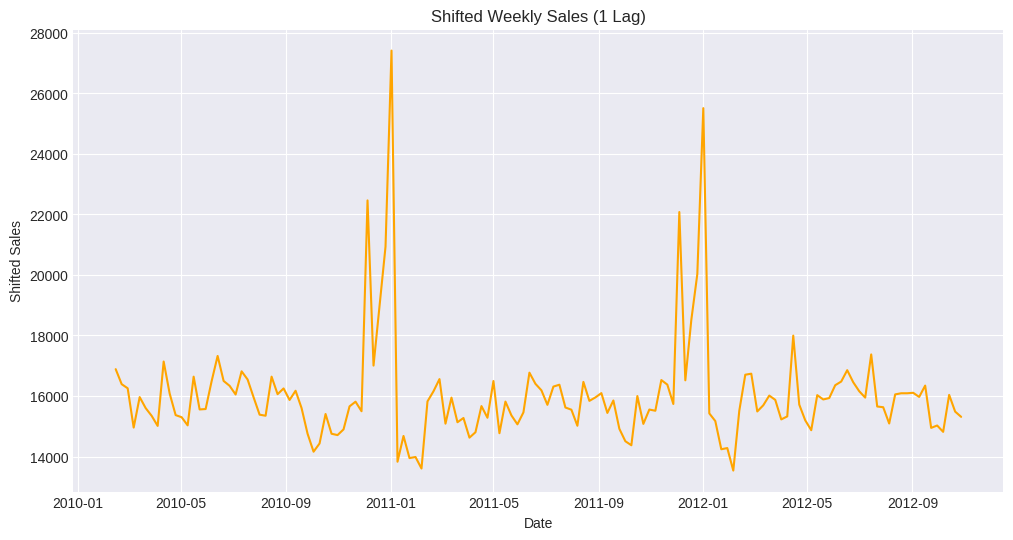

In [ ]:
# Shifted data by 1 lag
df_week['Weekly_Sales_shifted'] = df_week['Weekly_Sales'].shift(1)

# Plot the shifted data
plt.figure(figsize=(12, 6))
plt.plot(df_week.index, df_week['Weekly_Sales_shifted'], color='orange')
plt.title("Shifted Weekly Sales (1 Lag)")
plt.xlabel("Date")
plt.ylabel("Shifted Sales")
plt.grid(True)
plt.show()

## **Auto-ARIMA Model**

In [ ]:
df = pd.read_csv("clean_data.csv", parse_dates=['Date'], index_col='Date')
df_week = df['Weekly_Sales'].resample('W').mean()

# train (70%) and test (30%) split
train_size = int(0.7 * len(df_week))
train, test = df_week[:train_size], df_week[train_size:]

print("Train Data Shape:", train.shape)
print("Test Data Shape:", test.shape)

Train Data Shape: (100,)
Test Data Shape: (43,)


**ADFuller Test**

In [ ]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the cleaned data
df = pd.read_csv("train.csv", parse_dates=['Date'], index_col='Date')

# Resample the data to weekly frequency
df_week = df['Weekly_Sales'].resample('W').mean()

# Perform the ADFuller Test
def adf_test(timeseries):
    print("Results of Augmented Dickey-Fuller Test:")
    result = adfuller(timeseries, autolag='AIC')
    labels = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result[:4], labels):
        print(f"{label}: {value}")

    print("\nCritical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.3f}")

    # Conclusion
    if result[1] <= 0.05:
        print("\nConclusion: Reject the null hypothesis (H0) - The data is stationary.")
    else:
        print("\nConclusion: Fail to reject the null hypothesis (H0) - The data is non-stationary.")

# Call the function on weekly sales data
adf_test(df_week)

Results of Augmented Dickey-Fuller Test:
Test Statistic: -5.930802744748703
p-value: 2.3832272706103574e-07
#Lags Used: 4
Number of Observations Used: 138

Critical Values:
   1%: -3.479
   5%: -2.883
   10%: -2.578

Conclusion: Reject the null hypothesis (H0) - The data is stationary.


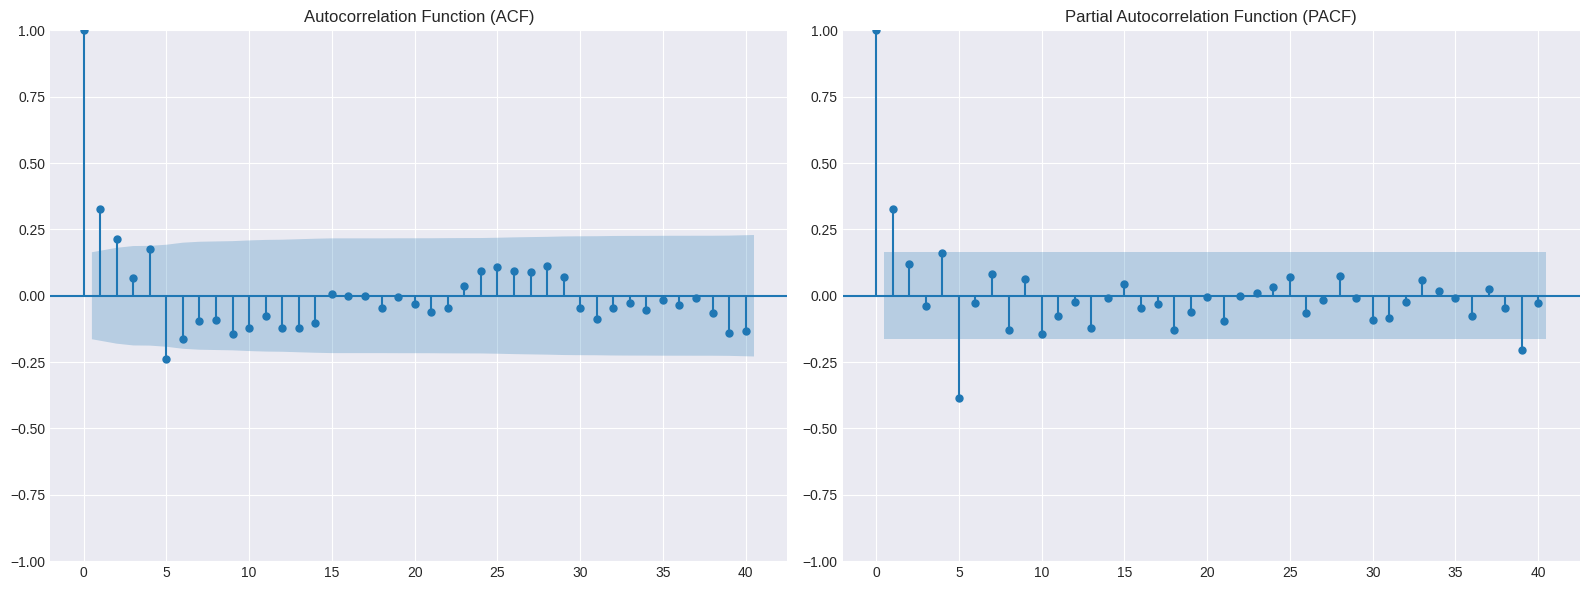

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the cleaned data
df = pd.read_csv("clean_data.csv", parse_dates=['Date'], index_col='Date')

# Resample the data to weekly frequency
df_week = df['Weekly_Sales'].resample('W').mean()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF Plot
plot_acf(df_week.dropna(), lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot
plot_pacf(df_week.dropna(), lags=40, ax=axes[1], method='ywm')
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

Root Mean Squared Error (RMSE): 602.66


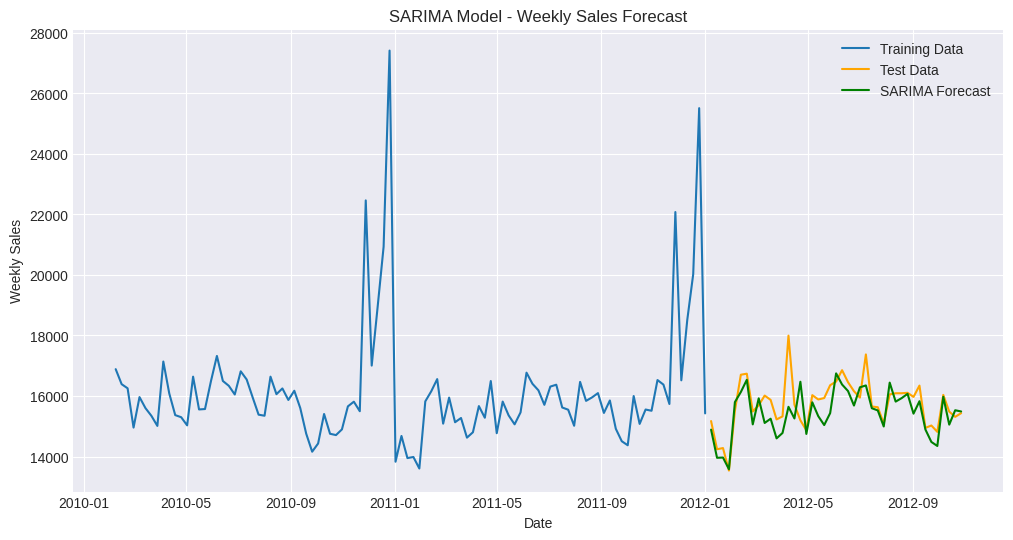

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load and preprocess the data
df = pd.read_csv("clean_data.csv", parse_dates=['Date'], index_col='Date')

# Resample to weekly frequency
df_week = df['Weekly_Sales'].resample('W').mean()

# Step 2: Split the data into train and test sets (70% train, 30% test)
train_size = int(len(df_week) * 0.7)
train_data, test_data = df_week[:train_size], df_week[train_size:]

# Step 3: Define and fit the SARIMA model
# Order: (p, d, q) and Seasonal order: (P, D, Q, S)
sarima_model = SARIMAX(train_data,
                       order=(1, 1, 1),              # ARIMA(p,d,q)
                       seasonal_order=(1, 1, 1, 52),  # Seasonal order (P,D,Q,S)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit(disp=False)

# Step 4: Forecast using the SARIMA model
forecast_steps = len(test_data)
forecast = sarima_result.forecast(steps=forecast_steps)

# Step 5: Evaluate the model
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 6: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Test Data", color='orange')
plt.plot(test_data.index, forecast, label="SARIMA Forecast", color='green')
plt.title("SARIMA Model - Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.981323230868168
p-value: 0.0015115284998155044


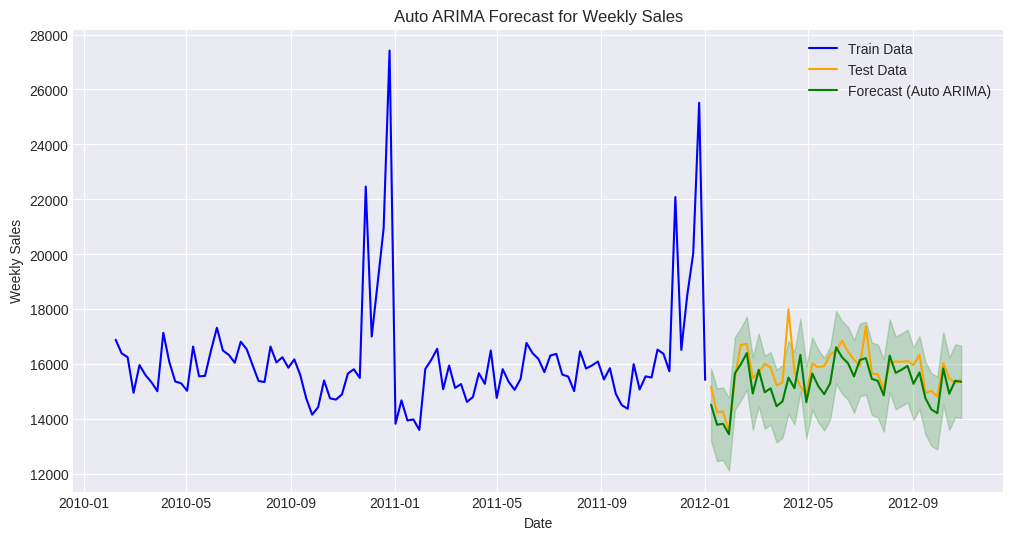

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test, label='Test Data', color='orange')
plt.plot(forecast_series, label='Forecast (Auto ARIMA)', color='green')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='green', alpha=0.2)
plt.title("Auto ARIMA Forecast for Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

**Auto-ARIMA model**

In [ ]:
from pmdarima import auto_arima

# Find the best SARIMA parameters
stepwise_model = auto_arima(train_data,
                            seasonal=True, m=52,  # Weekly seasonality (m=52)
                            trace=True,
                            suppress_warnings=True,
                            error_action='ignore',
                            stepwise=True)

print(stepwise_model.summary())

# Fit the best model
best_model = SARIMAX(train_data,
                     order=stepwise_model.order,
                     seasonal_order=stepwise_model.seasonal_order)
result = best_model.fit()

# Forecast
forecast = result.forecast(steps=len(test_data))

# Evaluate and plot
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f"Improved RMSE: {rmse:.2f}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=1775.248, Time=17.16 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1813.025, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1790.971, Time=2.04 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=5.86 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2225.311, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=5.97 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=1773.861, Time=9.86 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=1804.457, Time=0.29 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=1775.820, Time=36.86 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=1778.491, Time=45.39 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=1774.236, Time=8.60 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=1776.307, Time=4.85 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=1774.643, Time=11.08 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=1781.622, Time=10.66 sec
 ARIMA(1,0,1)(1,0,0)[52]

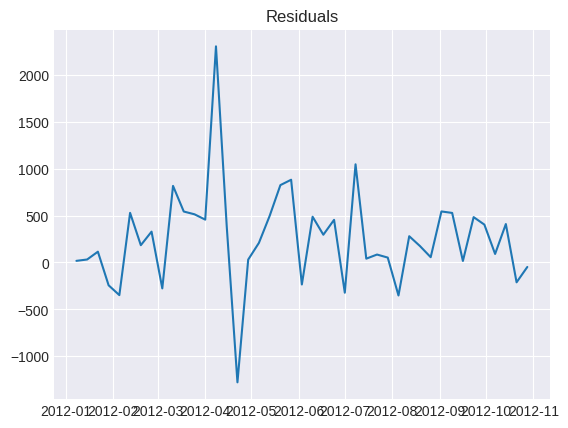

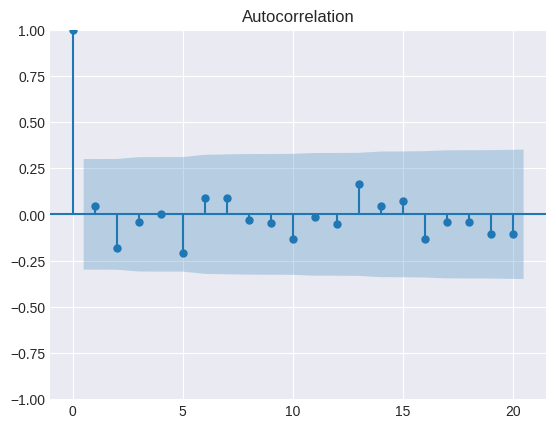

In [ ]:
residuals = test_data - forecast
plt.plot(residuals)
plt.title("Residuals")
plt.show()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals.dropna(), lags=20)
plt.show()

Comparing ARIMA and SARIMA

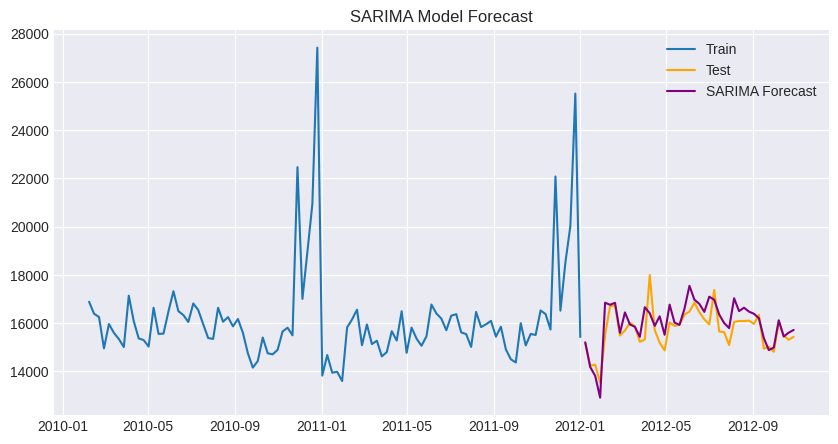

SARIMA RMSE: 605.33
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=1775.248, Time=8.05 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1813.025, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1790.971, Time=2.09 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=2.58 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2225.311, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=8.47 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=1773.861, Time=6.70 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=1804.457, Time=0.29 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=1775.820, Time=38.98 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=1778.491, Time=42.33 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=1774.236, Time=5.38 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=1776.307, Time=6.49 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=1774.643, Time=9.43 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=1781.622, Time=10.62 sec
 ARIMA

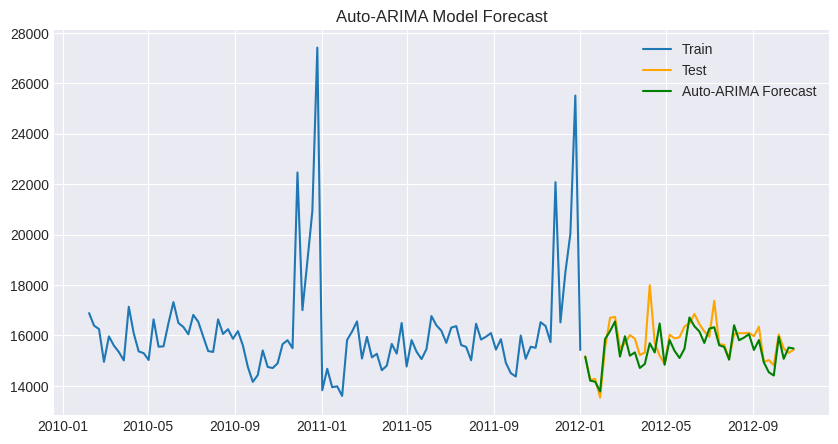

Auto-ARIMA RMSE: 574.43

Model Comparison:
SARIMA: RMSE = 605.33
Auto-ARIMA: RMSE = 574.43

The best performing model is: Auto-ARIMA with RMSE = 574.43


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("clean_data.csv", parse_dates=['Date'], index_col='Date')

# Resample data weekly
df_week = df['Weekly_Sales'].resample('W').mean().dropna()

# Split the data into train and test (70% train, 30% test)
train_size = int(len(df_week) * 0.7)
train, test = df_week[:train_size], df_week[train_size:]

# Initialize RMSE dictionary to store model performance
rmse_scores = {}

# ---------- SARIMA Model ----------
# Fit SARIMA model
sarima_order = (1, 1, 1, 52)  # Example seasonal order (P, D, Q, s)
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=sarima_order)
sarima_result = sarima_model.fit()

# Forecast using SARIMA
sarima_forecast = sarima_result.forecast(steps=len(test))

# Calculate RMSE for SARIMA
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
rmse_scores['SARIMA'] = sarima_rmse

# Plot SARIMA Results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='purple')
plt.title("SARIMA Model Forecast")
plt.legend()
plt.show()

print(f"SARIMA RMSE: {sarima_rmse:.2f}")

# ---------- Auto-ARIMA Model ----------
# Fit Auto-ARIMA model
auto_arima_model = auto_arima(train, seasonal=True, m=52,
                              trace=True, suppress_warnings=True, stepwise=True,
                              error_action='ignore')

# Forecast using Auto-ARIMA
auto_arima_forecast = auto_arima_model.predict(n_periods=len(test))

# Calculate RMSE for Auto-ARIMA
auto_arima_rmse = np.sqrt(mean_squared_error(test, auto_arima_forecast))
rmse_scores['Auto-ARIMA'] = auto_arima_rmse

# Plot Auto-ARIMA Results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, auto_arima_forecast, label='Auto-ARIMA Forecast', color='green')
plt.title("Auto-ARIMA Model Forecast")
plt.legend()
plt.show()

print(f"Auto-ARIMA RMSE: {auto_arima_rmse:.2f}")

# ---------- Model Comparison ----------
# Compare RMSE values
print("\nModel Comparison:")
for model, rmse in rmse_scores.items():
    print(f"{model}: RMSE = {rmse:.2f}")

# Identify the best model
best_model = min(rmse_scores, key=rmse_scores.get)
print(f"\nThe best performing model is: {best_model} with RMSE = {rmse_scores[best_model]:.2f}")

Fitting Auto-ARIMA Model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1817.527, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2225.311, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1848.538, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2119.268, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1818.126, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1816.751, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1816.184, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1805.301, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1807.863, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1804.632, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1813.025, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1803.865, Time=0.13 sec
 ARIMA(3,0,0)(0

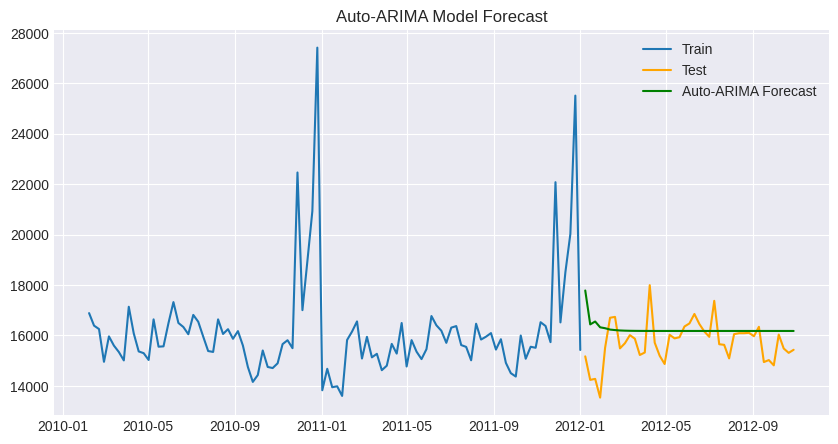

Auto-ARIMA RMSE: 1024.50

Fitting Auto-SARIMA Model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=1775.248, Time=5.28 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1813.025, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1790.971, Time=2.20 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=5.33 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2225.311, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=5.80 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=1773.861, Time=9.13 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=1804.457, Time=0.29 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=1775.820, Time=35.80 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=1778.491, Time=41.94 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=1774.236, Time=8.23 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=1776.307, Time=4.82 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=1774.643, Time=10.93 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   :

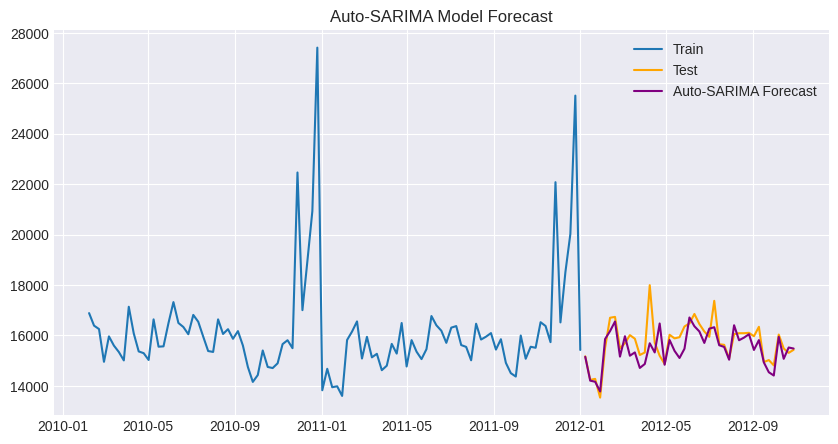

Auto-SARIMA RMSE: 574.43

Model Comparison:
Auto-ARIMA RMSE: 1024.50
Auto-SARIMA RMSE: 574.43

Auto-SARIMA performs better.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

# Load the data
df = pd.read_csv("clean_data.csv", parse_dates=['Date'], index_col='Date')

# Resample data to weekly frequency
df_week = df['Weekly_Sales'].resample('W').mean().dropna()

# Split data into train and test (70% training, 30% testing)
train_size = int(len(df_week) * 0.7)
train, test = df_week[:train_size], df_week[train_size:]

# ---------- Auto-ARIMA Model (Non-Seasonal) ----------
print("Fitting Auto-ARIMA Model...")
auto_arima_model = auto_arima(train, seasonal=False,
                              trace=True, suppress_warnings=True, stepwise=True,
                              error_action="ignore")

# Forecast using Auto-ARIMA
auto_arima_forecast = auto_arima_model.predict(n_periods=len(test))

# Calculate RMSE for Auto-ARIMA
auto_arima_rmse = np.sqrt(mean_squared_error(test, auto_arima_forecast))

# Plot Auto-ARIMA results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, auto_arima_forecast, label='Auto-ARIMA Forecast', color='green')
plt.title("Auto-ARIMA Model Forecast")
plt.legend()
plt.show()

print(f"Auto-ARIMA RMSE: {auto_arima_rmse:.2f}")

# ---------- Auto-SARIMA Model (Seasonal) ----------
print("\nFitting Auto-SARIMA Model...")
auto_sarima_model = auto_arima(train, seasonal=True, m=52,  # m=52 for weekly seasonality
                               trace=True, suppress_warnings=True, stepwise=True,
                               error_action="ignore")

# Forecast using Auto-SARIMA
auto_sarima_forecast = auto_sarima_model.predict(n_periods=len(test))

# Calculate RMSE for Auto-SARIMA
auto_sarima_rmse = np.sqrt(mean_squared_error(test, auto_sarima_forecast))

# Plot Auto-SARIMA results
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, auto_sarima_forecast, label='Auto-SARIMA Forecast', color='purple')
plt.title("Auto-SARIMA Model Forecast")
plt.legend()
plt.show()

print(f"Auto-SARIMA RMSE: {auto_sarima_rmse:.2f}")

# ---------- Compare Models ----------
print("\nModel Comparison:")
print(f"Auto-ARIMA RMSE: {auto_arima_rmse:.2f}")
print(f"Auto-SARIMA RMSE: {auto_sarima_rmse:.2f}")

# Identify the best model
if auto_arima_rmse < auto_sarima_rmse:
    print("\nAuto-ARIMA performs better.")
else:
    print("\nAuto-SARIMA performs better.")

Fitting Auto-ARIMA Model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1817.527, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2225.311, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1848.538, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2119.268, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1818.126, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1816.751, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1816.184, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1805.301, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1807.863, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1804.632, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1813.025, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1803.865, Time=0.12 sec
 ARIMA(3,0,0)(0

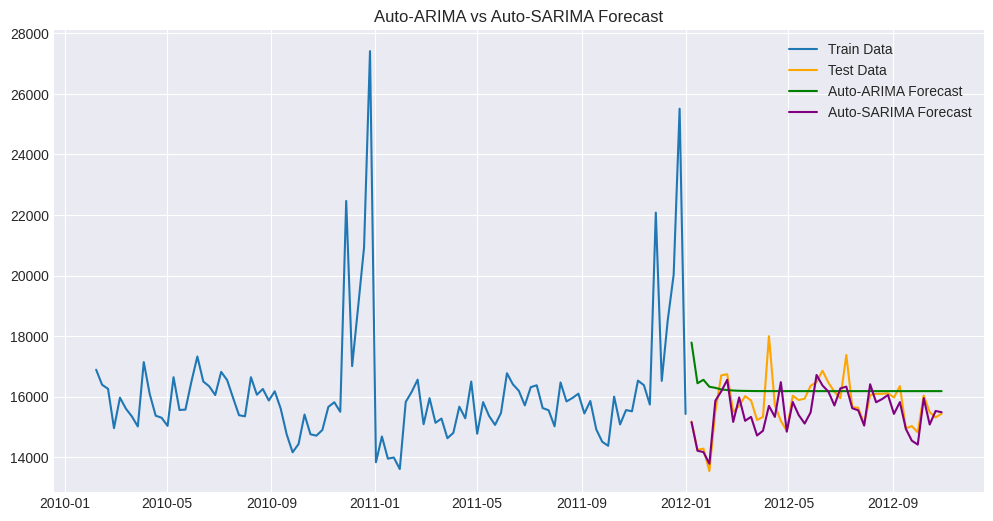

Evaluation Metrics Comparison:

Auto-ARIMA:
MSE: 1049606.66
RMSE: 1024.50
WMAE: 594.47

Auto-SARIMA:
MSE: 329967.81
RMSE: 574.43
WMAE: 374.39

Auto-SARIMA performs better based on RMSE.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv("clean_data.csv", parse_dates=['Date'], index_col='Date')

# Resample data to weekly frequency
df_week = df['Weekly_Sales'].resample('W').mean().dropna()

# Split the data into train and test (70% training, 30% testing)
train_size = int(len(df_week) * 0.7)
train, test = df_week[:train_size], df_week[train_size:]

# Function to calculate WMAE (Weighted Mean Absolute Error)
def calculate_wmae(actual, predicted, weights):
    return np.sum(weights * np.abs(actual - predicted)) / np.sum(weights)

# ---------- Auto-ARIMA Model ----------
print("Fitting Auto-ARIMA Model...")
auto_arima_model = auto_arima(train,
                              seasonal=False, stepwise=True, trace=True,
                              error_action="ignore", suppress_warnings=True,
                              information_criterion='aic')

# Forecast using Auto-ARIMA
auto_arima_forecast = auto_arima_model.predict(n_periods=len(test))

# Evaluation Metrics for Auto-ARIMA
mse_auto_arima = mean_squared_error(test, auto_arima_forecast)
rmse_auto_arima = np.sqrt(mse_auto_arima)
wmae_auto_arima = calculate_wmae(test, auto_arima_forecast, weights=np.arange(1, len(test)+1))

# ---------- Auto-SARIMA Model ----------
print("\nFitting Auto-SARIMA Model...")
auto_sarima_model = auto_arima(train,
                               seasonal=True, m=52, stepwise=True, trace=True,
                               error_action="ignore", suppress_warnings=True,
                               information_criterion='aic')

# Forecast using Auto-SARIMA
auto_sarima_forecast = auto_sarima_model.predict(n_periods=len(test))

# Evaluation Metrics for Auto-SARIMA
mse_auto_sarima = mean_squared_error(test, auto_sarima_forecast)
rmse_auto_sarima = np.sqrt(mse_auto_sarima)
wmae_auto_sarima = calculate_wmae(test, auto_sarima_forecast, weights=np.arange(1, len(test)+1))

# ---------- Plot the Results ----------
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data', color='orange')
plt.plot(test.index, auto_arima_forecast, label='Auto-ARIMA Forecast', color='green')
plt.plot(test.index, auto_sarima_forecast, label='Auto-SARIMA Forecast', color='purple')
plt.title("Auto-ARIMA vs Auto-SARIMA Forecast")
plt.legend()
plt.show()

# ---------- Print Evaluation Metrics ----------
print("Evaluation Metrics Comparison:")
print("\nAuto-ARIMA:")
print(f"MSE: {mse_auto_arima:.2f}")
print(f"RMSE: {rmse_auto_arima:.2f}")
print(f"WMAE: {wmae_auto_arima:.2f}")

print("\nAuto-SARIMA:")
print(f"MSE: {mse_auto_sarima:.2f}")
print(f"RMSE: {rmse_auto_sarima:.2f}")
print(f"WMAE: {wmae_auto_sarima:.2f}")

# Identify the Best Model
if rmse_auto_arima < rmse_auto_sarima:
    print("\nAuto-ARIMA performs better based on RMSE.")
else:
    print("\nAuto-SARIMA performs better based on RMSE.")

In [ ]:
References: https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast